Padraig Punch 8487103

In [1]:
# running on google colab need the feature engine
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
%matplotlib inline
from feature_engine.creation import CyclicalFeatures

In [3]:
df = pd.read_csv('./bank.csv')

In [4]:
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [5]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Some general plots first on age and balance against education and marital status

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


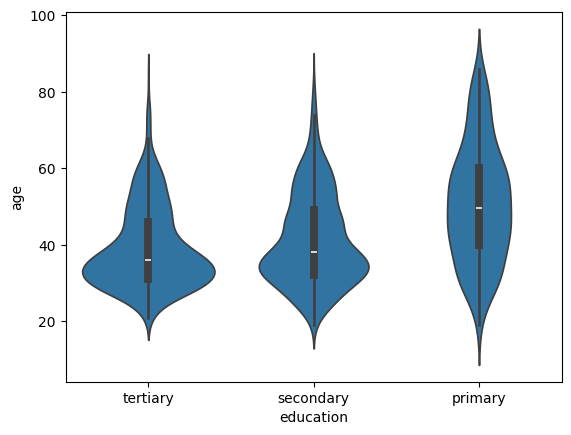

In [7]:
sns.violinplot(data=df, x='education', y='age')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


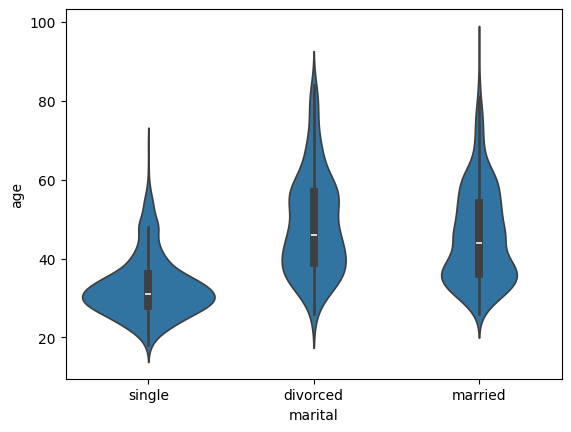

In [8]:
sns.violinplot(data=df, x='marital', y='age')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


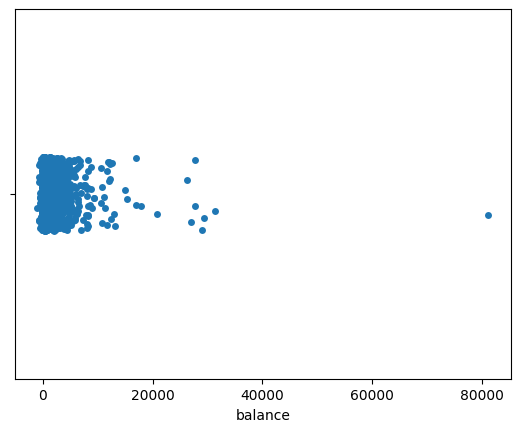

In [17]:
sns.stripplot(x=df['balance'])
plt.show()

Outliers here in balance

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


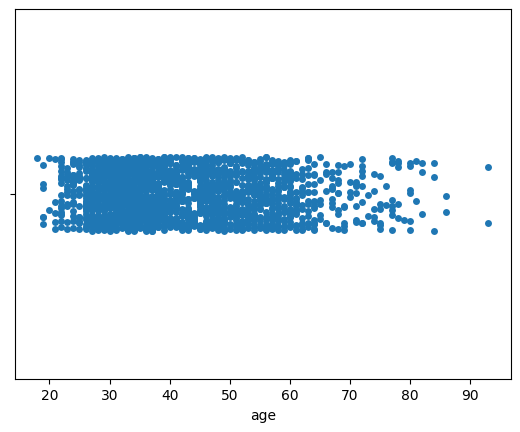

In [18]:
sns.stripplot(x=df['age'])
plt.show()

Task 1: What is the probability of getting a customer to subscribe to the saving scheme based on whether they have a housing or other loan, I will ignore default there are only 15 in the 2000 that have defaulted

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


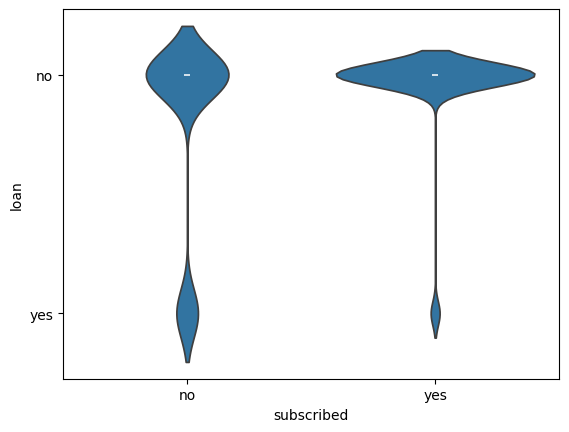

In [12]:
sns.violinplot(data=df, x='subscribed', y='loan')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


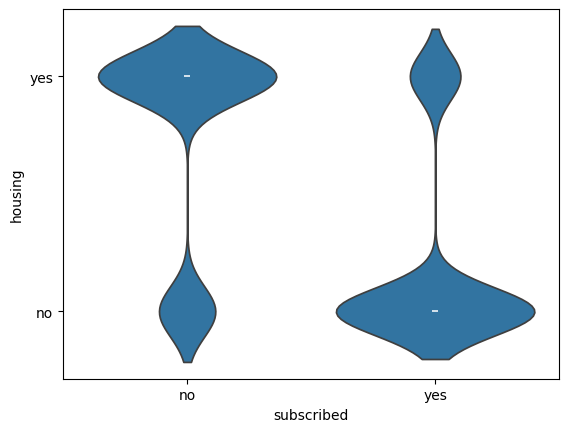

In [13]:
sns.violinplot(data=df, x='subscribed', y='housing')
plt.show()

In [21]:
frequency_table_loan= df['loan'].value_counts(ascending=True)
print('Frequency Table for loan:')
print(frequency_table_loan)

Frequency Table for loan:
loan
yes     250
no     1750
Name: count, dtype: int64


In [22]:
frequency_table_housing = df['housing'].value_counts(ascending=True)
print('Frequency Table for housing:')
print(frequency_table_housing)

Frequency Table for housing:
housing
yes     963
no     1037
Name: count, dtype: int64


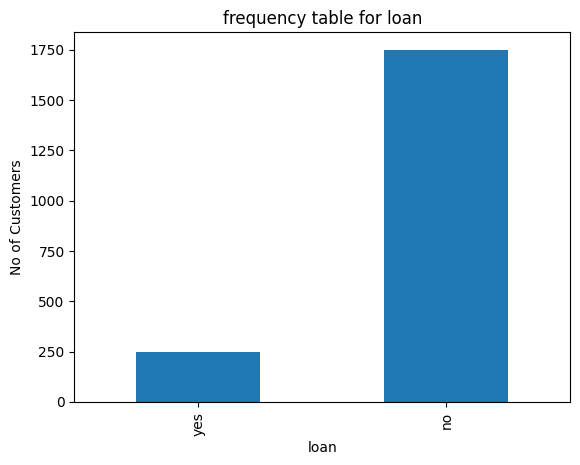

In [23]:
# Plot the frequency table for loan
frequency_table_loan.plot(kind='bar')
plt.xlabel('loan')
plt.ylabel('No of Customers')
plt.title('frequency table for loan')
plt.show()

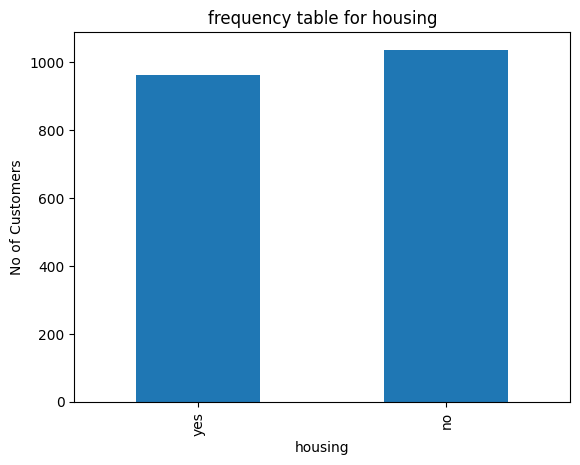

In [25]:
# Plot the frequency table for housing
frequency_table_housing.plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('No of Customers')
plt.title('frequency table for housing')
plt.show()

In [43]:
frequency_table_default = df['default'].value_counts(ascending=True)
print('Frequency Table for default:')
print(frequency_table_default)

Frequency Table for default:
default
yes      15
no     1985
Name: count, dtype: int64


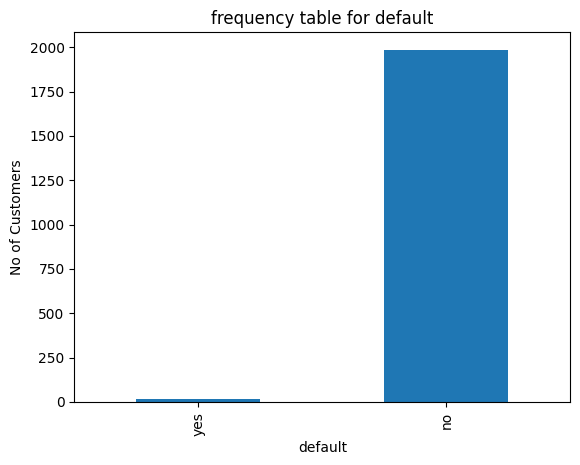

In [45]:
# Plot the frequency table for default
frequency_table_default.plot(kind='bar')
plt.xlabel('default')
plt.ylabel('No of Customers')
plt.title('frequency table for default')
plt.show()

In [29]:
pivot_table_LD = df.pivot_table(values='subscribed',
                                index='default',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LD)

         subscribed
default            
no         0.503275
yes        0.066667


In [30]:
pivot_table_LL = df.pivot_table(values='subscribed',
                                index='loan',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LL)

      subscribed
loan            
no      0.546857
yes     0.172000


In [32]:
pivot_table_LH = df.pivot_table(values='subscribed',
                                index='housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
print(pivot_table_LH)

         subscribed
housing            
no         0.768563
yes        0.210800


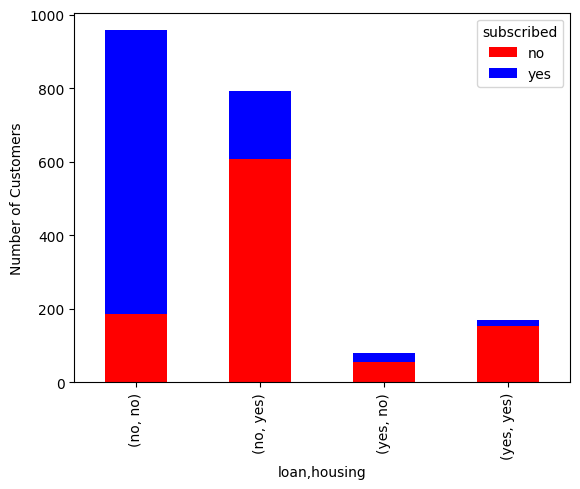

In [39]:
crosstab_CGL = pd.crosstab([df['loan'], df['housing']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Customers')
plt.show()

Conclusion people with neither type of loan are more lightly to subscribe, those with a housing loan are more llightly to subscribe than those with an ordinary loan By profession in the heatmaps below admin and blue collar are more lightly to subscribe if they have a housing loan figures are very low in the same heatmap for subscribing if you have an ordinary loan. Violin plots and bar charts illustrate the conclusion

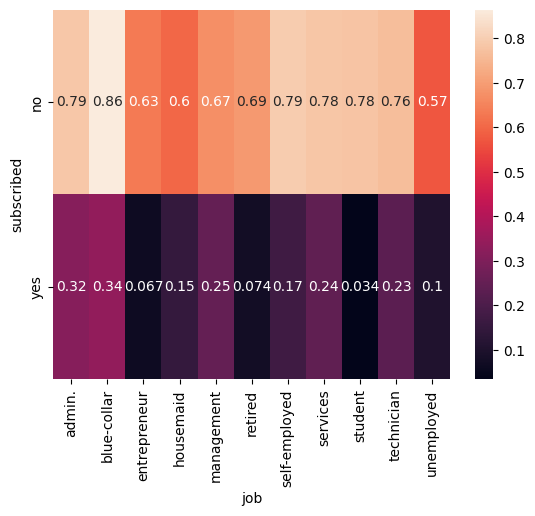

In [11]:
pivot_table_LCG = df.pivot_table(values='housing',
                           index='subscribed',
                           columns='job',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

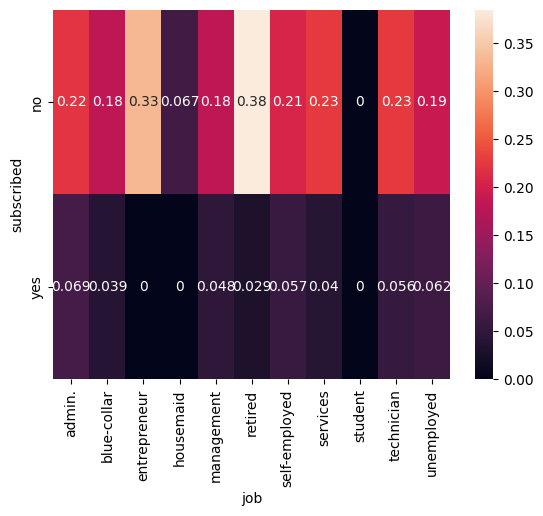

In [12]:
pivot_table_LCG = df.pivot_table(values='loan',
                           index='subscribed',
                           columns='job',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

Task 2

Find the missing values overall 2000 rows: age:12, job:10, education:104, contact:191, poutcome:454

In [64]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Fill missing age with age mean

In [65]:
df['age'].fillna(df['age'].mean(), inplace=True)

<ipython-input-65-15e9ed7dc05b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


Encode Categorical to numerical using a mapper, atributes with missing values are mapped to 0

In [66]:
# Create a mapper

scale_mapper_job = {
"admin.":        1,
"blue-collar":   2,
"entrepreneur":  3,
"housemaid":     4,
"management":    5,
"retired":       6,
"self-employed": 7,
"services":      8,
"student":       9,
"technician":    10,
"unemployed":    11
}
df['job'] = df['job'].fillna(0)
df['job'] = df['job'].replace(scale_mapper_job)

scale_mapper_marital = {
"single":        1,
"divorced":      2,
"married":       3,
}
df['marital'] = df['marital'].replace(scale_mapper_marital)

scale_mapper_education = {
"primary":       1,
"secondary":     2,
"tertiary":      3,
}
df['education'] = df['education'].fillna(0)

df['education'] = df['education'].replace(scale_mapper_education)

scale_mapper_contact = {
"cellular":       1,
"telephone":      2,
}
df['contact'] = df['contact'].fillna(0)
df['contact'] = df['contact'].replace(scale_mapper_contact)

scale_mapper_month = {
"jan":        1,
"feb":        2,
"mar":        3,
"apr":        4,
"may":        5,
"jun":        6,
"jul":        7,
"aug":        8,
"sep":        9,
"oct":       10,
"nov":       11,
"dec":       12
}
df['month'] = df['month'].replace(scale_mapper_month)

scale_mapper_poutcome = {
"failure":    1,
"other":      2,
"sucess":     3
}
df['poutcome'] = df['poutcome'].fillna(0)
df['poutcome'] = df['poutcome'].replace(scale_mapper_poutcome)

df.tail()

<ipython-input-66-dd97d44f7922>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['job'] = df['job'].replace(scale_mapper_job)
<ipython-input-66-dd97d44f7922>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['marital'] = df['marital'].replace(scale_mapper_marital)
<ipython-input-66-dd97d44f7922>:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

age  job  marital  education default  balance housing loan  contact  \
1995  20.0    9        1          0      no     2785      no   no        1   
1996  28.0    1        1          2      no      127      no   no        1   
1997  81.0    6        3          1      no     1154      no   no        2   
1998  46.0    8        3          1      no     4343     yes   no        0   
1999  40.0    3        3          2      no     6403      no   no        1   

      day  month  duration  campaign  pdays  previous poutcome subscribed  
1995   16      9       327         2     -1         0        0        yes  
1996   16      9      1334         2     -1         0        0        yes  
1997   17      9       231         1     -1         0        0        yes  
1998   20      9       185         1     -1         0        0        yes  
1999   22      9       208         2     -1         0        0        yes

One hot encode binary categorical attributes

In [67]:
# one-hot encode the binary categorical columns (no NaNs in these columns)

df = pd.get_dummies(df, columns=['default','housing', 'loan', 'subscribed'],
#                        dummy_na=True,
                        drop_first=True)
df.tail()

age  job  marital  education  balance  contact  day  month  duration  \
1995  20.0    9        1          0     2785        1   16      9       327   
1996  28.0    1        1          2      127        1   16      9      1334   
1997  81.0    6        3          1     1154        2   17      9       231   
1998  46.0    8        3          1     4343        0   20      9       185   
1999  40.0    3        3          2     6403        1   22      9       208   

      campaign  pdays  previous poutcome  default_yes  housing_yes  loan_yes  \
1995         2     -1         0        0        False        False     False   
1996         2     -1         0        0        False        False     False   
1997         1     -1         0        0        False        False     False   
1998         1     -1         0        0        False         True     False   
1999         2     -1         0        0        False        False     False   

      subscribed_yes  
1995            True  
1996            True  
1997            True  
1998            True  
1999            True

Create a new feature if the customer has a loan or a housing loan merge (binary OR-ing) those 2 columns to a new column loans and drop existing 2 columns, reasoning: if the customer already has any type of loan they are unlightly to subscribe to a term deposit, evident in the exploring the dataset in task 1

In [68]:
df['loans'] = df[['housing_yes','loan_yes']].max(axis=1)
df = df.drop(['housing_yes','loan_yes'],axis=1)
df.tail()

age  job  marital  education  balance  contact  day  month  duration  \
1995  20.0    9        1          0     2785        1   16      9       327   
1996  28.0    1        1          2      127        1   16      9      1334   
1997  81.0    6        3          1     1154        2   17      9       231   
1998  46.0    8        3          1     4343        0   20      9       185   
1999  40.0    3        3          2     6403        1   22      9       208   

      campaign  pdays  previous poutcome  default_yes  subscribed_yes  loans  
1995         2     -1         0        0        False            True  False  
1996         2     -1         0        0        False            True  False  
1997         1     -1         0        0        False            True  False  
1998         1     -1         0        0        False            True   True  
1999         2     -1         0        0        False            True  False

In [69]:
# check all NaNs removed

df.isna().sum()

age               0
job               0
marital           0
education         0
balance           0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
default_yes       0
subscribed_yes    0
loans             0
dtype: int64

In [70]:
df.describe()

age          job      marital    education       balance  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean     41.753018     5.633000     2.218500     2.129500   1413.663500   
std      12.686108     3.235049     0.919337     0.801281   3131.224213   
min      18.000000     0.000000     1.000000     0.000000   -980.000000   
25%      32.000000     2.000000     1.000000     2.000000    201.500000   
50%      38.000000     5.000000     3.000000     2.000000    551.000000   
75%      50.000000     9.000000     3.000000     3.000000   1644.500000   
max      93.000000    11.000000     3.000000     3.000000  81204.000000   

           contact          day        month     duration     campaign  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.977500    13.851500     5.002500   292.020500     1.909500   
std       0.409973     9.712189     3.079974   221.557295     1.378862   
min       0.000000     1.000000     1.000000     7.000000     1.000000   
25%       1.000000     5.000000     2.000000   146.000000     1.000000   
50%       1.000000    12.000000     5.000000   236.000000     1.000000   
75%       1.000000    23.000000     7.000000   379.000000     2.000000   
max       2.000000    31.000000    12.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

Encode Cylindrical features day and month (day may not be marginally in-accurate not all months have 31 days)

In [71]:
cyclical = CyclicalFeatures(variables=None, drop_original=False)
df1 = df[['day','month']].copy()
df1 = cyclical.fit_transform(df1)
day_sin = df1['day_sin']
df = pd.concat([df,day_sin],axis=1)
day_cos = df1['day_cos']
df = pd.concat([df,day_cos],axis=1)
month_sin = df1['month_sin']
df = pd.concat([df,month_sin],axis=1)
month_cos = df1['month_cos']
df = pd.concat([df,month_cos],axis=1)

print(cyclical.max_values_)

{'day': 31, 'month': 12}


In [72]:
df.describe()

age          job      marital    education       balance  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean     41.753018     5.633000     2.218500     2.129500   1413.663500   
std      12.686108     3.235049     0.919337     0.801281   3131.224213   
min      18.000000     0.000000     1.000000     0.000000   -980.000000   
25%      32.000000     2.000000     1.000000     2.000000    201.500000   
50%      38.000000     5.000000     3.000000     2.000000    551.000000   
75%      50.000000     9.000000     3.000000     3.000000   1644.500000   
max      93.000000    11.000000     3.000000     3.000000  81204.000000   

           contact          day        month     duration     campaign  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.977500    13.851500     5.002500   292.020500     1.909500   
std       0.409973     9.712189     3.079974   221.557295     1.378862   
min       0.000000     1.000000     1.000000     7.000000     1.000000   
25%       1.000000     5.000000     2.000000   146.000000     1.000000   
50%       1.000000    12.000000     5.000000   236.000000     1.000000   
75%       1.000000    23.000000     7.000000   379.000000     2.000000   
max       2.000000    31.000000    12.000000  1823.000000    11.000000   

             pdays     previous      day_sin      day_cos    month_sin  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    167.896000     2.561500     0.200956     0.185124     0.218295   
std     131.754126     3.400735     0.659767     0.700368     0.685899   
min      -1.000000     0.000000    -0.998717    -0.994869    -1.000000   
25%      75.750000     1.000000    -0.394356    -0.440394    -0.500000   
50%     182.000000     2.000000     0.394356     0.347305     0.500000   
75%     251.000000     3.000000     0.848644     0.820763     0.866025   
max     854.000000    55.000000     0.998717     1.000000     1.000000   

          month_cos  
count  2.000000e+03  
mean  -7.347338e-02  
std    6.906266e-01  
min   -1.000000e+00  
25%   -8.660254e-01  
50%   -1.836970e-16  
75%    5.000000e-01  
max    1.000000e+00

Look for outliers balance has one at 80000

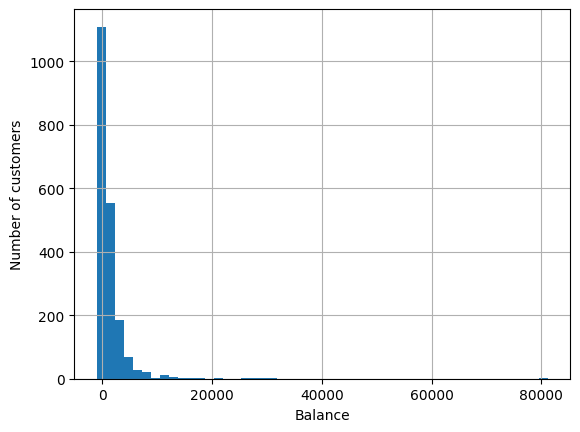

In [73]:
# Plot Balance
df['balance'].hist(bins=50)
plt.xlabel("Balance")
plt.ylabel('Number of customers')

plt.show()

Correct balance using log technique

In [74]:
df[['balance']].min()
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)

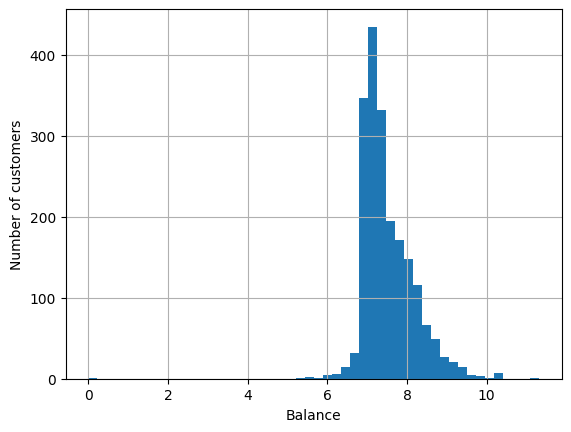

In [75]:
df['balance'].hist(bins=50)
plt.xlabel("Balance")
plt.ylabel('Number of customers')

plt.show()

In age there are 2 outliers at 93

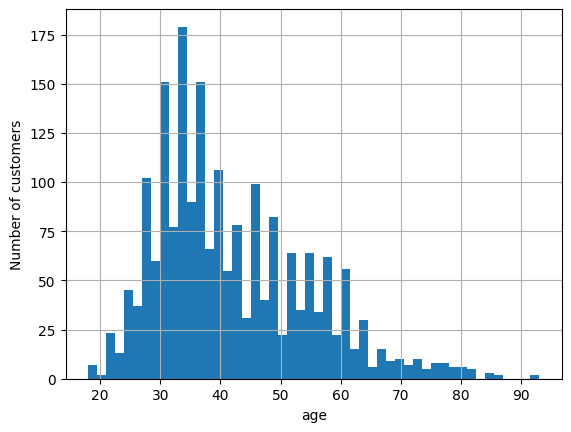

In [76]:
# Plot Age
df['age'].hist(bins=50)
plt.xlabel("age")
plt.ylabel('Number of customers')

plt.show()

In [77]:
df['age'].min()
df['age'] = np.log(df['age'] + abs(min(df['age'])) + 1)

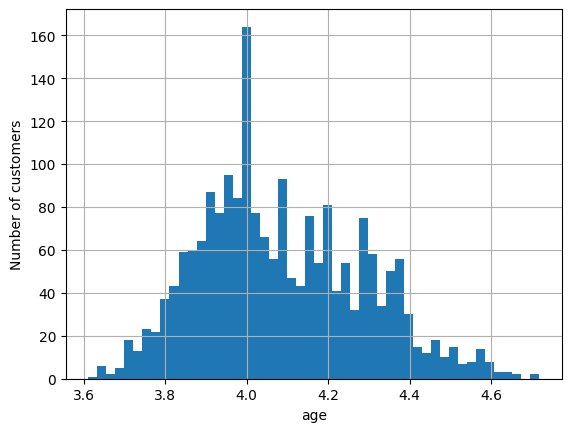

In [78]:
df['age'].hist(bins=50)
plt.xlabel("age")
plt.ylabel('Number of customers')

plt.show()

Use robust scaling on balance and age

In [79]:
robust_scaler = RobustScaler()
df[['age',
    'balance']] = robust_scaler.fit_transform(df[['age','balance']])
df.tail()

age  job  marital  education   balance  contact  day  month  \
1995 -1.255421    9        1          0  1.127625        1   16      9   
1996 -0.638160    1        1          2 -0.406220        1   16      9   
1997  1.859591    6        3          1  0.416093        2   17      9   
1998  0.434483    8        3          1  1.561669        0   20      9   
1999  0.114087    3        3          2  1.971742        1   22      9   

      duration  campaign  pdays  previous poutcome  default_yes  \
1995       327         2     -1         0        0        False   
1996      1334         2     -1         0        0        False   
1997       231         1     -1         0        0        False   
1998       185         1     -1         0        0        False   
1999       208         2     -1         0        0        False   

      subscribed_yes  loans   day_sin   day_cos  month_sin     month_cos  
1995            True  False -0.101168 -0.994869       -1.0 -1.836970e-16  
1996            True  False -0.101168 -0.994869       -1.0 -1.836970e-16  
1997            True  False -0.299363 -0.954139       -1.0 -1.836970e-16  
1998            True   True -0.790776 -0.612106       -1.0 -1.836970e-16  
1999            True  False -0.968077 -0.250653       -1.0 -1.836970e-16

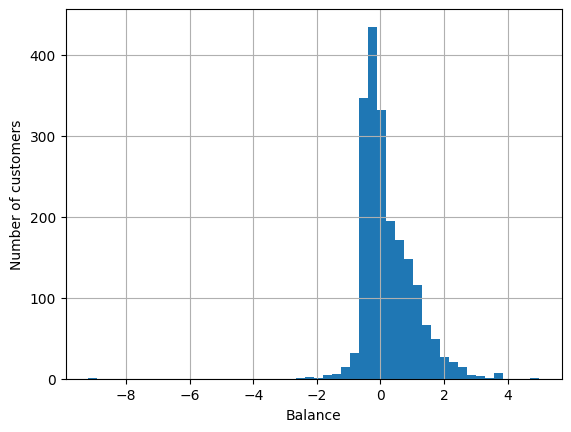

In [80]:
df['balance'].hist(bins=50)
plt.xlabel("Balance")
plt.ylabel('Number of customers')

plt.show()

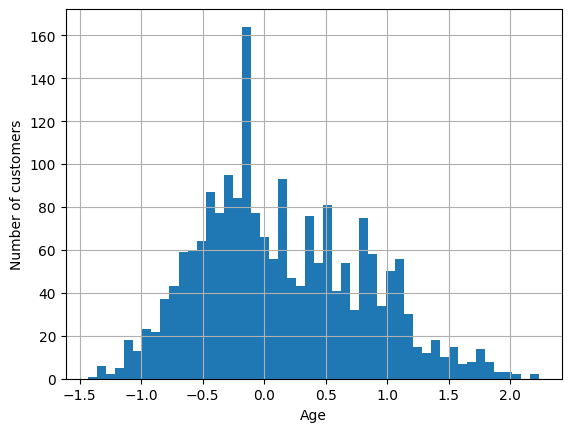

In [81]:
df['age'].hist(bins=50)
plt.xlabel("Age")
plt.ylabel('Number of customers')

plt.show()

Age and Balance have more normal distributions after scaling

In [82]:
df.describe()

age          job      marital    education      balance  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.143269     5.633000     2.218500     2.129500     0.221335   
std       0.660913     3.235049     0.919337     0.801281     0.817268   
min      -1.429576     0.000000     1.000000     0.000000    -9.195028   
25%      -0.367955     2.000000     1.000000     2.000000    -0.324636   
50%       0.000000     5.000000     3.000000     2.000000     0.000000   
75%       0.632045     9.000000     3.000000     3.000000     0.675364   
max       2.234503    11.000000     3.000000     3.000000     4.992723   

           contact          day        month     duration     campaign  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.977500    13.851500     5.002500   292.020500     1.909500   
std       0.409973     9.712189     3.079974   221.557295     1.378862   
min       0.000000     1.000000     1.000000     7.000000     1.000000   
25%       1.000000     5.000000     2.000000   146.000000     1.000000   
50%       1.000000    12.000000     5.000000   236.000000     1.000000   
75%       1.000000    23.000000     7.000000   379.000000     2.000000   
max       2.000000    31.000000    12.000000  1823.000000    11.000000   

             pdays     previous      day_sin      day_cos    month_sin  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    167.896000     2.561500     0.200956     0.185124     0.218295   
std     131.754126     3.400735     0.659767     0.700368     0.685899   
min      -1.000000     0.000000    -0.998717    -0.994869    -1.000000   
25%      75.750000     1.000000    -0.394356    -0.440394    -0.500000   
50%     182.000000     2.000000     0.394356     0.347305     0.500000   
75%     251.000000     3.000000     0.848644     0.820763     0.866025   
max     854.000000    55.000000     0.998717     1.000000     1.000000   

          month_cos  
count  2.000000e+03  
mean  -7.347338e-02  
std    6.906266e-01  
min   -1.000000e+00  
25%   -8.660254e-01  
50%   -1.836970e-16  
75%    5.000000e-01  
max    1.000000e+00

To bring other attributes into range 0 to 1 divide by their maximums ignoring outliers in these attributes

In [90]:
df['job'] = df['job'] / 11
df['marital'] = df['marital'] / 3
df['education'] = df['education'] / 3
df['contact'] = df['contact'] / 2
df['campaign'] = df['campaign'] / df['campaign'].max()
df['duration'] = df['duration'] / df['duration'].max()
df['day'] = df['day'] / 31
df['month'] = df['month'] / 12
df['pdays'] = df['pdays'] / df['pdays'].max()
df['previous'] = df['previous'] / df['previous'].max()


In [91]:
df.describe()

age          job      marital    education      balance  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.143269     0.512091     0.739500     0.709833     0.221335   
std       0.660913     0.294095     0.306446     0.267094     0.817268   
min      -1.429576     0.000000     0.333333     0.000000    -9.195028   
25%      -0.367955     0.181818     0.333333     0.666667    -0.324636   
50%       0.000000     0.454545     1.000000     0.666667     0.000000   
75%       0.632045     0.818182     1.000000     1.000000     0.675364   
max       2.234503     1.000000     1.000000     1.000000     4.992723   

           contact          day        month     duration     campaign  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.488750     0.446823     0.416875     0.160187     0.173591   
std       0.204986     0.313296     0.256664     0.121534     0.125351   
min       0.000000     0.032258     0.083333     0.003840     0.090909   
25%       0.500000     0.161290     0.166667     0.080088     0.090909   
50%       0.500000     0.387097     0.416667     0.129457     0.090909   
75%       0.500000     0.741935     0.583333     0.207899     0.181818   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             pdays     previous      day_sin      day_cos    month_sin  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.196600     0.046573     0.200956     0.185124     0.218295   
std       0.154279     0.061832     0.659767     0.700368     0.685899   
min      -0.001171     0.000000    -0.998717    -0.994869    -1.000000   
25%       0.088700     0.018182    -0.394356    -0.440394    -0.500000   
50%       0.213115     0.036364     0.394356     0.347305     0.500000   
75%       0.293911     0.054545     0.848644     0.820763     0.866025   
max       1.000000     1.000000     0.998717     1.000000     1.000000   

          month_cos  
count  2.000000e+03  
mean  -7.347338e-02  
std    6.906266e-01  
min   -1.000000e+00  
25%   -8.660254e-01  
50%   -1.836970e-16  
75%    5.000000e-01  
max    1.000000e+00

In [44]:
#save prepared dataset
df.to_csv('bank_train_prepared.csv')